Index  
1. [추가변수1: 각각의차](#추가변수1)
2. [추가변수2 : mag별 가능한 모든 차이 조합](#추가변수2)
3. [추가변수3 : 각 ugriz밴드 끼리 PCA](#추가변수3)
4. [추가변수4 : 각 ugriz밴드 끼리 차](#추가변수4)
5. [추가변수5 : 각 ugriz밴드 끼리 통계값](#추가변수5)
6. [추가변수6 : fiberID에 따른 통계값](#추가변수6)
7. [Soon](#추가변수7)


# 데이터로드

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important; }</style>'))

import warnings
warnings.filterwarnings(action='ignore')


In [4]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [5]:
train_df.shape, test_df.shape

((199991, 22), (10009, 21))

# EDA

In [6]:
train_df.head()

type  fiberID   psfMag_u   psfMag_g   psfMag_r   psfMag_i  \
id                                                                        
0              QSO      601  23.198224  21.431953  21.314148  21.176553   
1              QSO      788  21.431355  20.708104  20.678850  20.703420   
2              QSO      427  17.851451  16.727898  16.679677  16.694640   
3              QSO      864  20.789900  20.040371  19.926909  19.843840   
4   STAR_RED_DWARF      612  26.454969  23.058767  21.471406  19.504961   

     psfMag_z  fiberMag_u  fiberMag_g  fiberMag_r  fiberMag_i  fiberMag_z  \
id                                                                          
0   21.171444   22.581309   21.644453   21.657571   21.387653   21.572827   
1   20.473229   21.868797   21.029773   20.967054   20.937731   21.063646   
2   16.641788   18.171890   17.033098   16.999682   17.095999   17.076449   
3   19.463270   21.039030   20.317165   20.217898   20.073852   19.794505   
4   18.389096   25.700632   23.629122   21.742750   19.861718   18.810375   

    petroMag_u  petroMag_g  petroMag_r  petroMag_i  petroMag_z  modelMag_u  \
id                                                                           
0    22.504317   21.431636   21.478312   21.145409   20.422446   22.749241   
1    21.360701   20.778968   20.889705   20.639812   20.646660   21.492955   
2    17.867253   16.738784   16.688874   16.744210   16.808006   17.818063   
3    20.433907   19.993727   19.985531   19.750917   19.455117   20.770711   
4    25.859229   22.426929   21.673551   19.610012   18.376141   24.877052   

    modelMag_g  modelMag_r  modelMag_i  modelMag_z  
id                                                  
0    21.465534   21.364187   21.020605   21.147340  
1    20.758527   20.753925   20.693389   20.512314  
2    16.697434   16.641249   16.660177   16.688928  
3    20.001699   19.889798   19.758113   19.552855  
4    23.147993   21.475342   19.487330   18.375655

In [8]:
#중위값 기준으로 대부분의 값이 20언저리임 
train_df.describe()

fiberID      psfMag_u       psfMag_g       psfMag_r  \
count  199991.000000  1.999910e+05  199991.000000  199991.000000   
mean      360.830152 -6.750146e+00      18.675373      18.401235   
std       225.305890  1.187678e+04     155.423024     127.128078   
min         1.000000 -5.310802e+06  -40022.466071  -27184.795793   
25%       174.000000  1.965259e+01      18.701180      18.048572   
50%       349.000000  2.087136e+01      19.904235      19.454492   
75%       526.000000  2.216043e+01      21.150297      20.515936   
max      1000.000000  1.877392e+04    3538.984910    3048.110913   

            psfMag_i       psfMag_z    fiberMag_u     fiberMag_g  \
count  199991.000000  199991.000000  1.999910e+05  199991.000000   
mean       18.043495      17.663526  1.084986e+01      19.072693   
std       116.622194     123.735298  4.172116e+03     749.256162   
min    -26566.310827  -24878.828280 -1.864766e+06 -215882.917191   
25%        17.747663      17.425523  1.994040e+01      18.902851   
50%        19.043895      18.611799  2.104910e+01      20.069038   
75%        20.073528      19.883760  2.233754e+01      21.385830   
max      4835.218639    9823.740407  4.870154e+03  248077.513380   

          fiberMag_r     fiberMag_i     fiberMag_z     petroMag_u  \
count  199991.000000  199991.000000  199991.000000  199991.000000   
mean       19.134483      18.183331      18.000882      21.837903   
std        90.049058     122.378972     145.862346     789.472333   
min    -21802.656144  -20208.516262  -26505.602101  -24463.431833   
25%        18.259352      17.903615      17.606148      19.247795   
50%        19.631419      19.188763      18.710967      20.366848   
75%        20.773911      20.331419      20.133179      21.797480   
max     12084.735440    8059.638535   18358.921741  298771.019041   

          petroMag_g     petroMag_r     petroMag_i     petroMag_z  \
count  199991.000000  199991.000000  199991.000000  199991.000000   
mean       18.454136      18.481525      17.686617      17.699207   
std       154.376277      97.240448     145.730872     142.691880   
min    -25958.752324  -23948.588523  -40438.184078  -30070.729379   
25%        18.113933      17.479794      17.050294      16.804705   
50%        19.586559      19.182789      18.693370      18.174592   
75%        21.004397      20.457491      20.019112      19.807652   
max     12139.815877    7003.136546    9772.190537   17403.789263   

          modelMag_u     modelMag_g     modelMag_r     modelMag_i  \
count  199991.000000  199991.000000  199991.000000  199991.000000   
mean       20.110991      18.544375      18.181544      17.692395   
std       122.299062     161.728183     133.984475     131.183416   
min    -26236.578659  -36902.402336  -36439.638493  -38969.416822   
25%        19.266214      18.076120      17.423425      16.977671   
50%        20.406840      19.547674      19.143156      18.641756   
75%        21.992898      20.962386      20.408140      19.968846   
max     14488.251976   10582.058590   12237.951703    4062.499371   

          modelMag_z  
count  199991.000000  
mean       17.189281  
std       133.685138  
min    -26050.710196  
25%        16.705774  
50%        18.100997  
75%        19.819554  
max      7420.534172

### 상관관계 확인
* psfMag_u,fiberMag_u, petroMag_u 간에 음의 상관관계

In [11]:
train_df.columns

Index(['type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object')

In [12]:
out1 = train_df[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i','psfMag_z',
         'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z']]

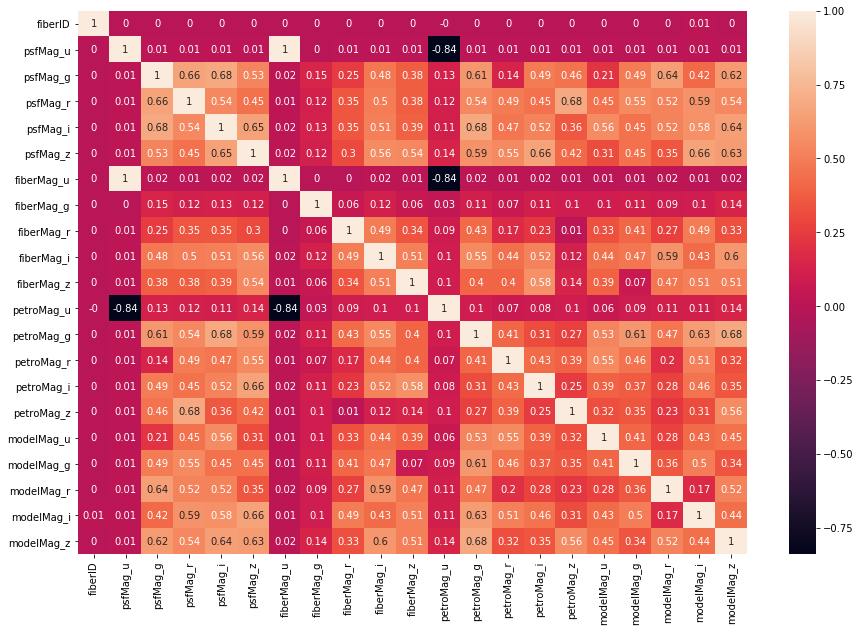

In [45]:
plt.figure(figsize =(15,10))
sns.heatmap(train_df.corr().applymap(lambda x :round(x,2)),annot = True)

# 추가변수1
* 각각의 차   
mag별 ugriz밴드간의 근접변수에 대해서만 컬럼생성 color-color map 참고

In [123]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [124]:
def add_minus_feature(data,test = False):
    '''
    mag별 ugriz밴드간의 근접변수에 대해서만 컬럼생성 color-color map 참고
    근접변수에 대해서만 컬럼생성 ex) 'fiberMag_u-g', 'fiberMag_g-r', 'fiberMag_r-i', 'fiberMag_i-z'
    (추가옵션)각 mag에서 가장 높은값의 filter를 받아오는 "~~mag_MAX"생성
    결과 38개로 증가 
    '''
    from itertools import combinations
    n = 0
    m = 0
    for count in range(5,21,5):
        s = 2
        if test == True :
            s = 1
        selected = data.columns[s:].values[n:count]
        mag = str.split(selected[0],'_')[0]
#         data[mag+"_MAX"] = data[selected].apply(lambda x : str.split(np.argmax(x),'_')[1],axis = 1)
        for i in range(0,len(selected)):        
            if i>0: 
                name_1st = str.split(m,'_')[1]
                name_2nd = str.split(selected[i],'_')[1]
                data[mag+"_"+name_1st+"-"+name_2nd] = data[m]-data[selected[i]]
            m = selected[i]    
        n=count
    return data

In [125]:
train_df = add_minus_feature(train_df)
test_df = add_minus_feature(test_df,True)

train_df.shape, test_df.shape

((199991, 38), (10009, 37))

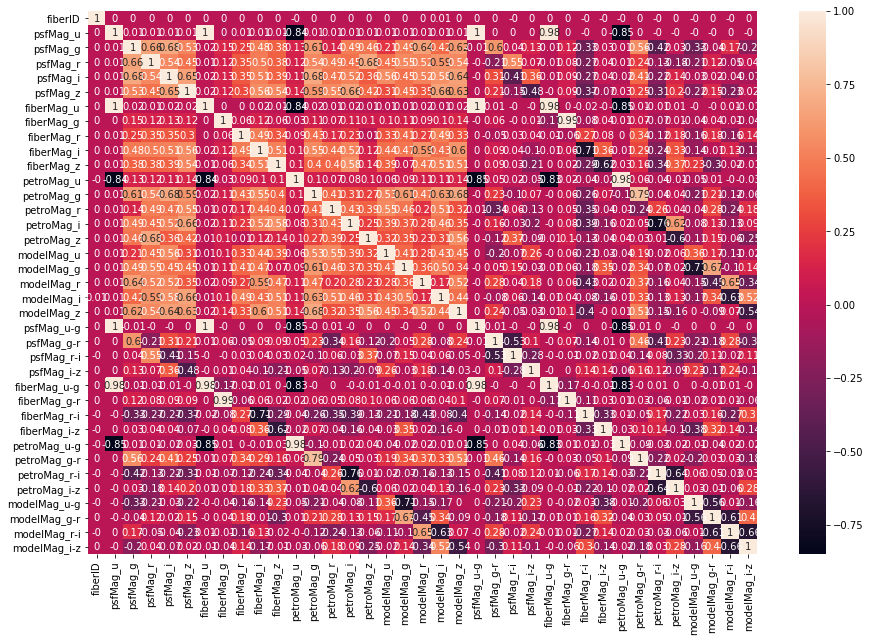

In [126]:
plt.figure(figsize =(15,10))
sns.heatmap(train_df.corr().applymap(lambda x :round(x,2)),annot = True)

# 추가변수2
* mag별 가능한 모든 차이 조합   
추가변수1과 다소 중복되나 모듭 조합을 고려함

In [53]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [54]:
def add_minus_feature_all(data,test = False):
    '''
    combination으로 모든 변수들의 조합에 대해서 컬럼생성 
    (추가옵션)각 mag에서 가장 높은값의 filter를 받아오는 "~~mag_MAX"생성
    결과 64개로 증가
    '''
    from itertools import combinations
    n = 0
    for count in range(5,21,5):
        s = 2
        if test == True :
            s = 1
        selected = data.columns[s:].values[n:count]
        mag = str.split(selected[0],'_')[0]
        data[mag+"_MAX"] = data[selected].apply(lambda x : str.split(np.argmax(x),'_')[1],axis = 1)
        for combi in list(combinations(selected,2)):
            name_1st = str.split(combi[0],'_')[1]
            name_2nd = str.split(combi[1],'_')[1]
            data[mag+"_"+name_1st+"-"+name_2nd] = data[combi[0]]-data[combi[1]]
        n=count
    return data

In [57]:
train_df = add_minus_feature_all(train_df)
test_df = add_minus_feature_all(test_df,True)

train_df.shape, test_df.shape

((199991, 66), (10009, 65))

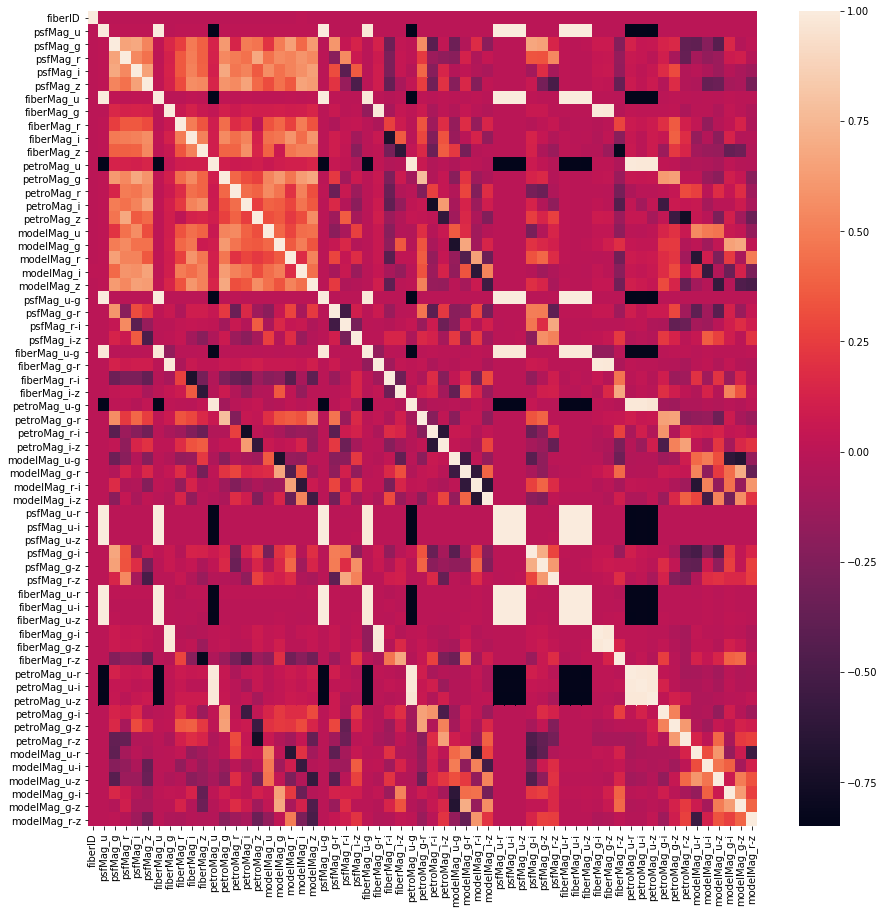

In [59]:
plt.figure(figsize =(15,15))
sns.heatmap(train_df.corr().applymap(lambda x :round(x,2)))

# 추가변수3
* 생성 : 각 ugriz밴드 끼리 PCA
* 생성이유 : 각 mag는 유사한 ugriz 수치를 보임 따라서 이를 PCA로 녹인다면 새로운 변수로 생성될 수 있지 않을까 생각함
* 결과  
    g의 경우 단 fibermag와   
    u의 경우 model을 제외한 나머지 전부  
    riz은 다른 변수들과도 큰 상관관계를 보임

In [279]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [118]:
from sklearn.decomposition import PCA
pca = PCA(1)

In [119]:
ori_name = ["psfMag","fiberMag","petroMag","modelMag"]
add_name = ["u","g","r","i","z"]

In [120]:
for add in add_name:
    selected = list(map(lambda x : x+"_"+add,ori_name))
    train_df['PCA_'+add] = pca.fit_transform(train_df[selected])

#### 함수화

In [277]:
def PCA_feature(data):
    '''
    각 ugriz밴드 끼리 PCA를 통해 추가변수 생성 시도
    '''
    from sklearn.decomposition import PCA
    pca = PCA(1)
    
    ori_name = ["psfMag","fiberMag","petroMag","modelMag"]
    add_name = ["u","g","r","i","z"]
    
    for add in add_name:
        selected = list(map(lambda x : x+"_"+add,ori_name))
        data['PCA_'+add] = pca.fit_transform(data[selected])
    return data

In [280]:
train_df = PCA_feature(train_df)

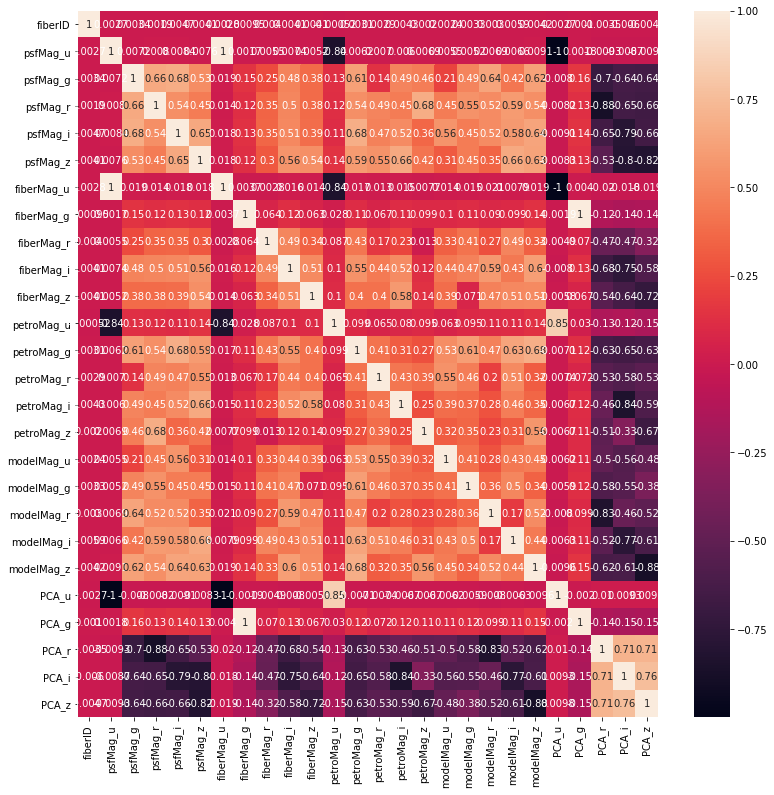

In [121]:
plt.figure(figsize=(13,13))
sns.heatmap(train_df.corr(),annot= True)

# 추가변수4
* 생성 : 각 ugriz밴드 끼리 차
* 생성이유 : 각 mag는 유사한 ugriz 수치를 보임 따라서 각 차이를 비교해서 변수로 추가
* 결론 : u단위에서 난리난다. 원인은 당연히 u단위가 비슷하기 때문이다.근데 왜 단순히 u만 문제가 될까?

In [86]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [60]:
ori_name = ["psfMag","fiberMag","petroMag","modelMag"]
add_name = ["u","g","r","i","z"]

In [96]:
for add in add_name:
    selected = list(map(lambda x : x+"_"+add,ori_name))
    columns = train_df[selected].columns 
    combi = list(combinations(columns,2))
    for i in range(0,len(combi)):
        train_df[combi[i][0]+"_"+combi[i][1]] = train_df[combi[i][0]] - train_df[combi[i][1]] 

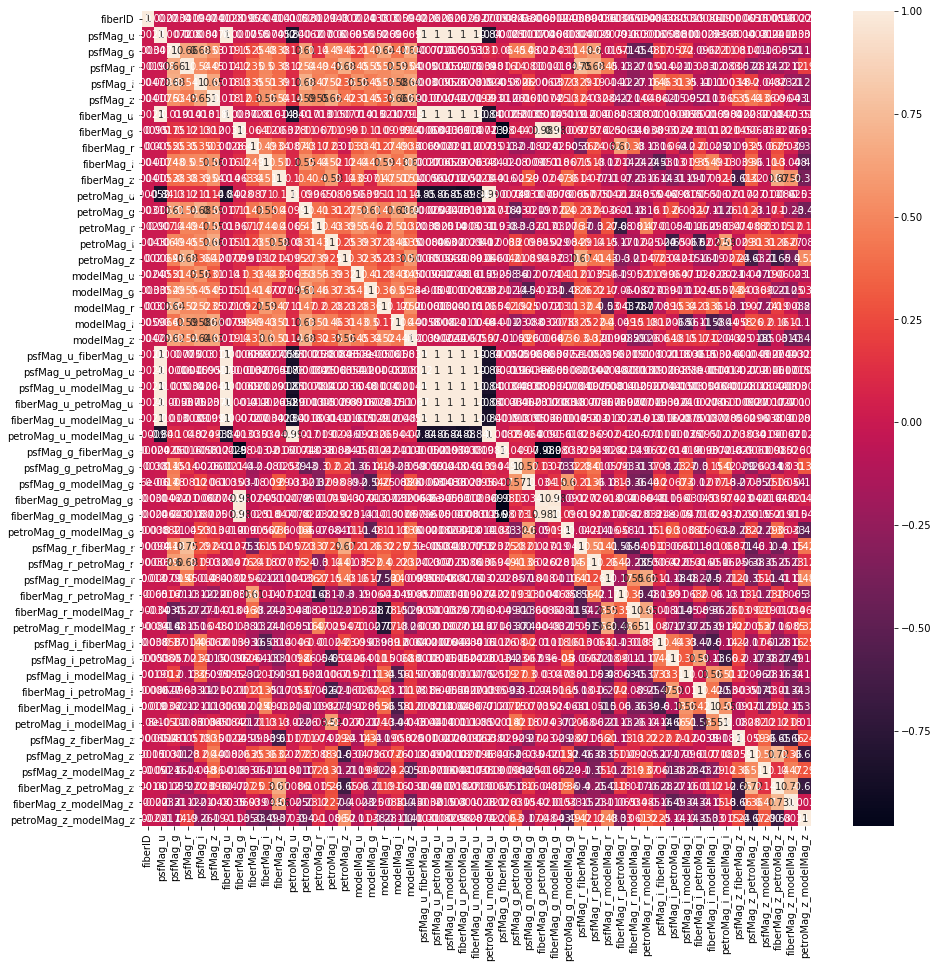

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot= True)

# 추가변수5 
* 생성 : 각 ugriz밴드 끼리 통계값
* 생성이유 : 각변수가 비슷했기 때문에
* 결론 : 뭘해도 너무 상관관계가 강하다
* 추가 의문사항 : u밴드는 outlier가 가장 많이 등장하는 band 중 하나임 따라서 한 mag에서 outlier가 등장하면 다른 mag에서도 문제가 있을까

In [243]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [244]:
ori_name = ["psfMag","fiberMag","petroMag","modelMag"]
add_name = ["u","g","r","i","z"]

In [245]:
for add in add_name:
    selected = list(map(lambda x : x+"_"+add,ori_name))
    columns = train_df[selected].columns 
    train_df[add+"_"+"mean"] = train_df[columns].mean(axis= 1)
    train_df[add+"_"+"std"] = train_df[columns].std(axis= 1)
    train_df[add+"_"+"min"] = train_df[columns].min(axis= 1)
    train_df[add+"_"+"max"] = train_df[columns].max(axis= 1)
    train_df[add+"_"+"median"] = train_df[columns].median(axis= 1)

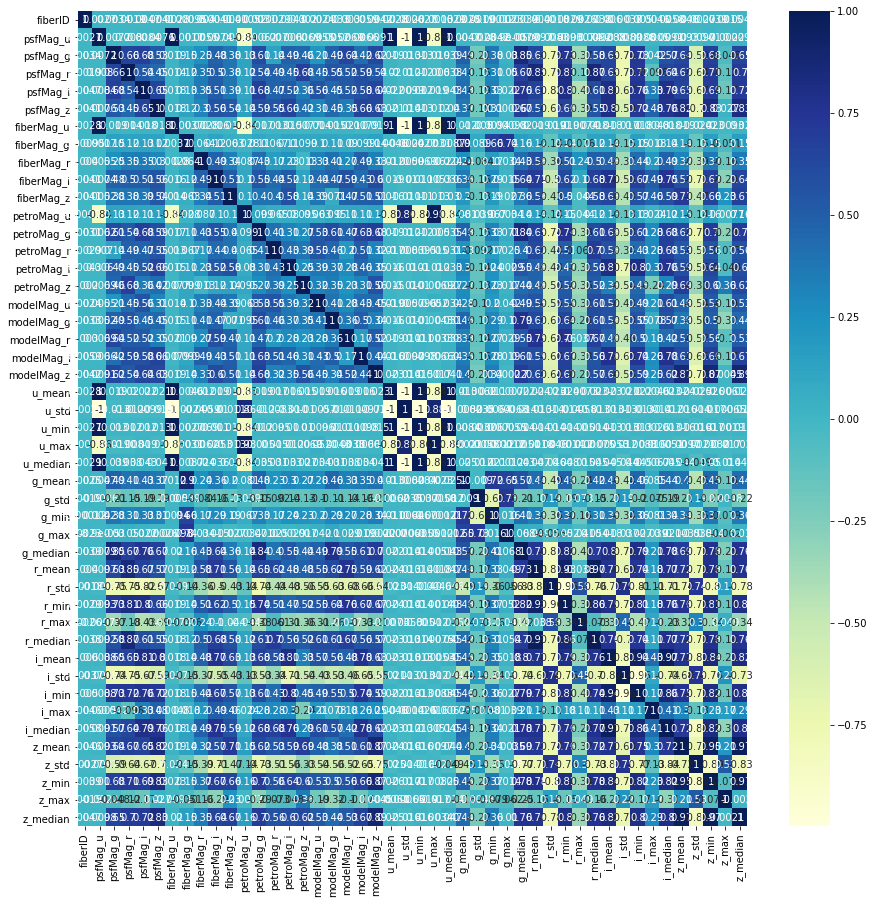

In [246]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot= True, cmap = "YlGnBu")

In [247]:
train_df.columns

Index(['type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'u_mean', 'u_std', 'u_min', 'u_max', 'u_median', 'g_mean',
       'g_std', 'g_min', 'g_max', 'g_median', 'r_mean', 'r_std', 'r_min',
       'r_max', 'r_median', 'i_mean', 'i_std', 'i_min', 'i_max', 'i_median',
       'z_mean', 'z_std', 'z_min', 'z_max', 'z_median'],
      dtype='object')

In [250]:
aa = train_df[['u_mean', 'u_std', 'u_min', 'u_max', 'u_median', 'g_mean',
       'g_std', 'g_min', 'g_max', 'g_median', 'r_mean', 'r_std', 'r_min',
       'r_max', 'r_median', 'i_mean', 'i_std', 'i_min', 'i_max', 'i_median',
       'z_mean', 'z_std', 'z_min', 'z_max', 'z_median']]

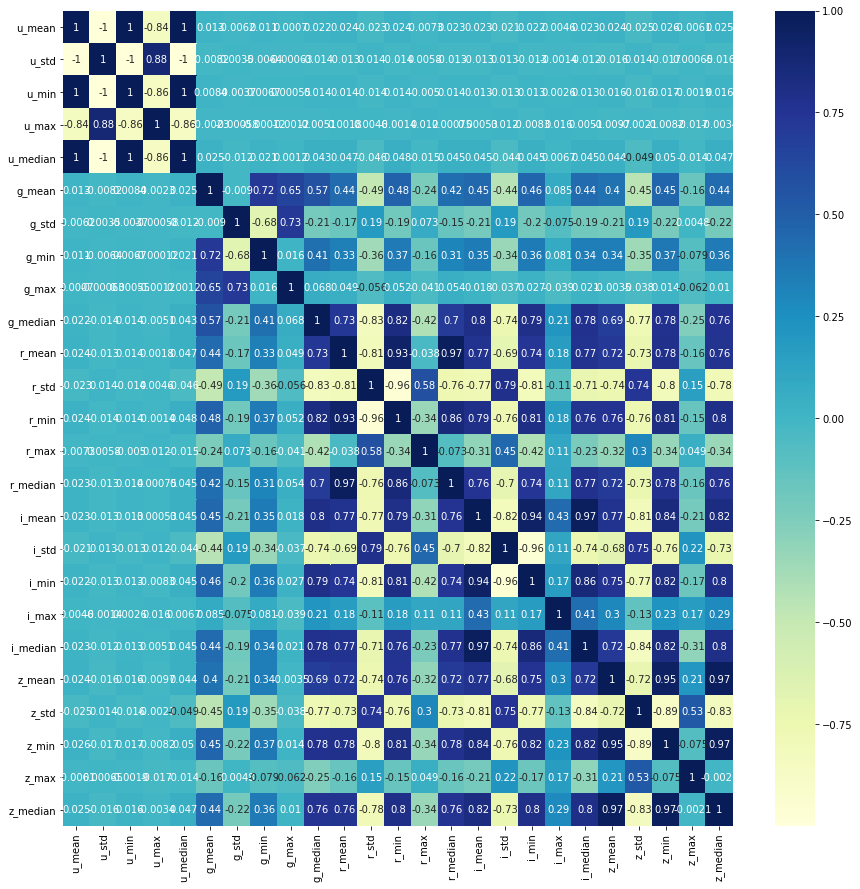

In [251]:
plt.figure(figsize=(15,15))
sns.heatmap(aa.corr(),annot= True, cmap = "YlGnBu")

# 추가변수6
* 생성 : fiberID에 따른 통계값
* 생성이유 : fiberID를 그냥 쓰기 부담스러워서
* case1 : mag별 
* case1 결과 
    mean, min,max,std 는 서로 상관관계가 높다 median과 std만 추출해서 사용해본다 (이또한 별로)
    

  
  
* case2 : ugriz band별
* case2 결과 : mean, min,max,std 는 서로 상관관계가 높다 median과 std만 추출해서 사용해본다 

### case1

In [272]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [273]:
ori_name = ["psfMag","fiberMag","petroMag","modelMag"]
add_name = ["u","g","r","i","z"]

In [274]:
for mag in ori_name:
    selected = list(map(lambda x : mag+"_"+x,add_name))
    columns = train_df[selected].columns 
    columns = list(columns)
    columns.append("fiberID")
    
    #dictinary_set
#     mean_dict = dict(train_df[columns].groupby("fiberID").mean().mean(axis = 1))
#     min_dict = dict(train_df[columns].groupby("fiberID").min().min(axis = 1))
#     max_dict = dict(train_df[columns].groupby("fiberID").max().max(axis = 1))
    median_dict = dict(train_df[columns].groupby("fiberID").median().median(axis = 1))
    std_dict = dict(train_df[columns].groupby("fiberID").std().std(axis = 1))
    
    #save
#     train_df["mean_"+mag] = train_df.fiberID.apply(lambda x : mean_dict.get(x))
#     train_df["min_"+mag] = train_df.fiberID.apply(lambda x : min_dict.get(x))
#     train_df["max_"+mag] = train_df.fiberID.apply(lambda x : max_dict.get(x))
    train_df["median_"+mag] = train_df.fiberID.apply(lambda x : median_dict.get(x))
    train_df["std_"+mag] = train_df.fiberID.apply(lambda x : std_dict.get(x))

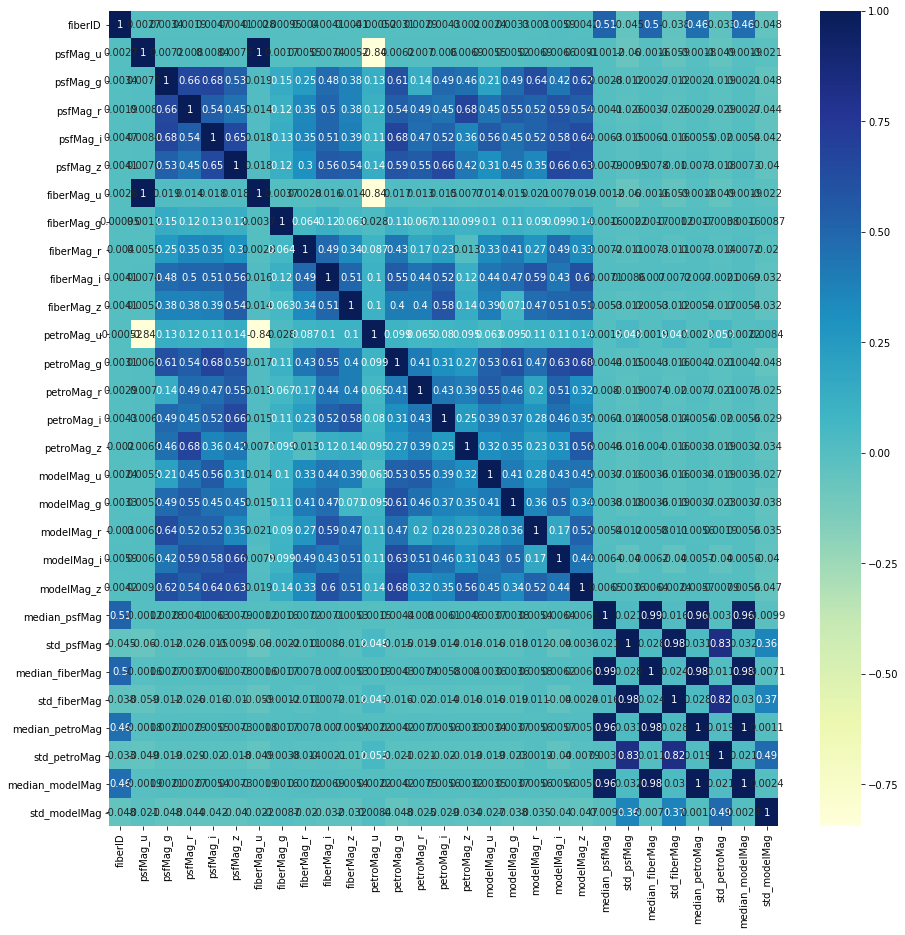

In [275]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot= True, cmap = "YlGnBu")

In [269]:
train_df.columns

Index(['type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'mean_psfMag', 'min_psfMag', 'max_psfMag',
       'median_psfMag', 'std_psfMag', 'mean_fiberMag', 'min_fiberMag',
       'max_fiberMag', 'median_fiberMag', 'std_fiberMag', 'mean_petroMag',
       'min_petroMag', 'max_petroMag', 'median_petroMag', 'std_petroMag',
       'mean_modelMag', 'min_modelMag', 'max_modelMag', 'median_modelMag',
       'std_modelMag'],
      dtype='object')

In [270]:
aa = train_df[['mean_psfMag', 'min_psfMag', 'max_psfMag',
       'median_psfMag', 'std_psfMag', 'mean_fiberMag', 'min_fiberMag',
       'max_fiberMag', 'median_fiberMag', 'std_fiberMag', 'mean_petroMag',
       'min_petroMag', 'max_petroMag', 'median_petroMag', 'std_petroMag',
       'mean_modelMag', 'min_modelMag', 'max_modelMag', 'median_modelMag',
       'std_modelMag']]

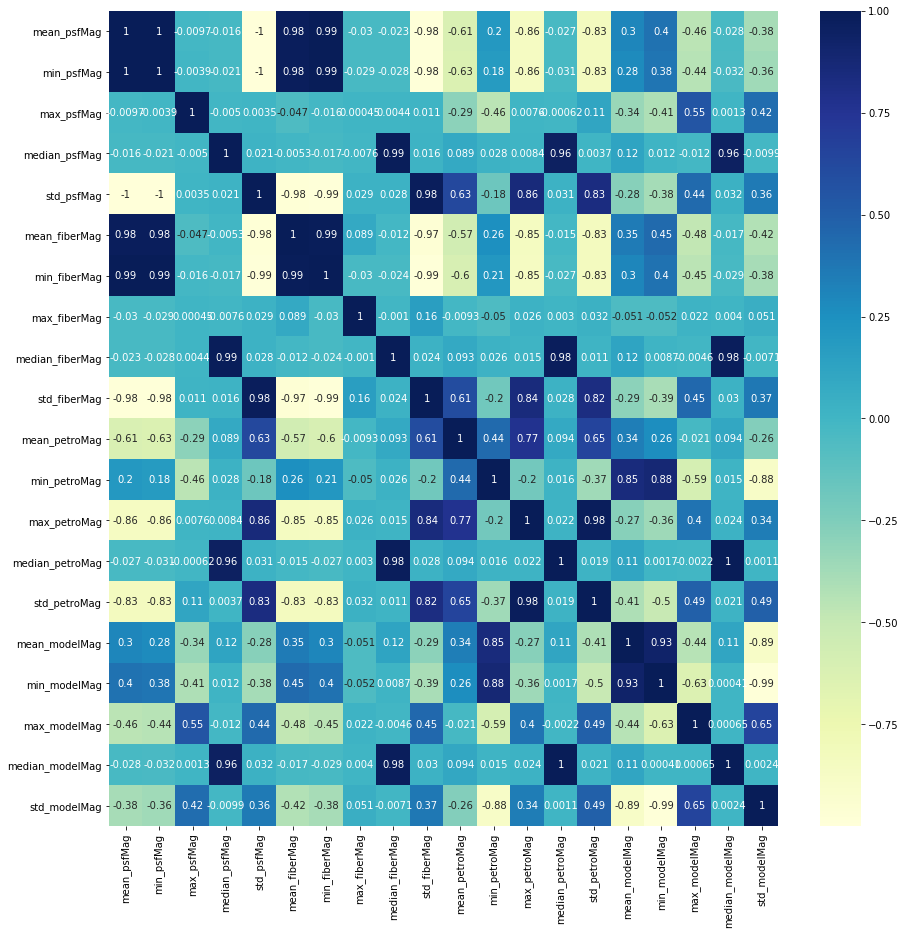

In [271]:
plt.figure(figsize=(15,15))
sns.heatmap(aa.corr(),annot= True, cmap = "YlGnBu")

### case2

In [209]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [210]:
ori_name = ["psfMag","fiberMag","petroMag","modelMag"]
add_name = ["u","g","r","i","z"]

In [211]:
for add in add_name:
    selected = list(map(lambda x : x+"_"+add,ori_name))
    columns = train_df[selected].columns 
    columns = list(columns)
    columns.append("fiberID")
    
    #dictinary_set
    mean_dict = dict(train_df[columns].groupby("fiberID").mean().mean(axis = 1))
    min_dict = dict(train_df[columns].groupby("fiberID").min().min(axis = 1))
    max_dict = dict(train_df[columns].groupby("fiberID").max().max(axis = 1))
    median_dict = dict(train_df[columns].groupby("fiberID").median().median(axis = 1))
    std_dict = dict(train_df[columns].groupby("fiberID").std().std(axis = 1))
    
    #save
    train_df["mean_"+add] = train_df.fiberID.apply(lambda x : mean_dict.get(x))
    train_df["min_"+add] = train_df.fiberID.apply(lambda x : min_dict.get(x))
    train_df["max_"+add] = train_df.fiberID.apply(lambda x : max_dict.get(x))
    train_df["median_"+add] = train_df.fiberID.apply(lambda x : median_dict.get(x))
    train_df["std_"+add] = train_df.fiberID.apply(lambda x : std_dict.get(x))

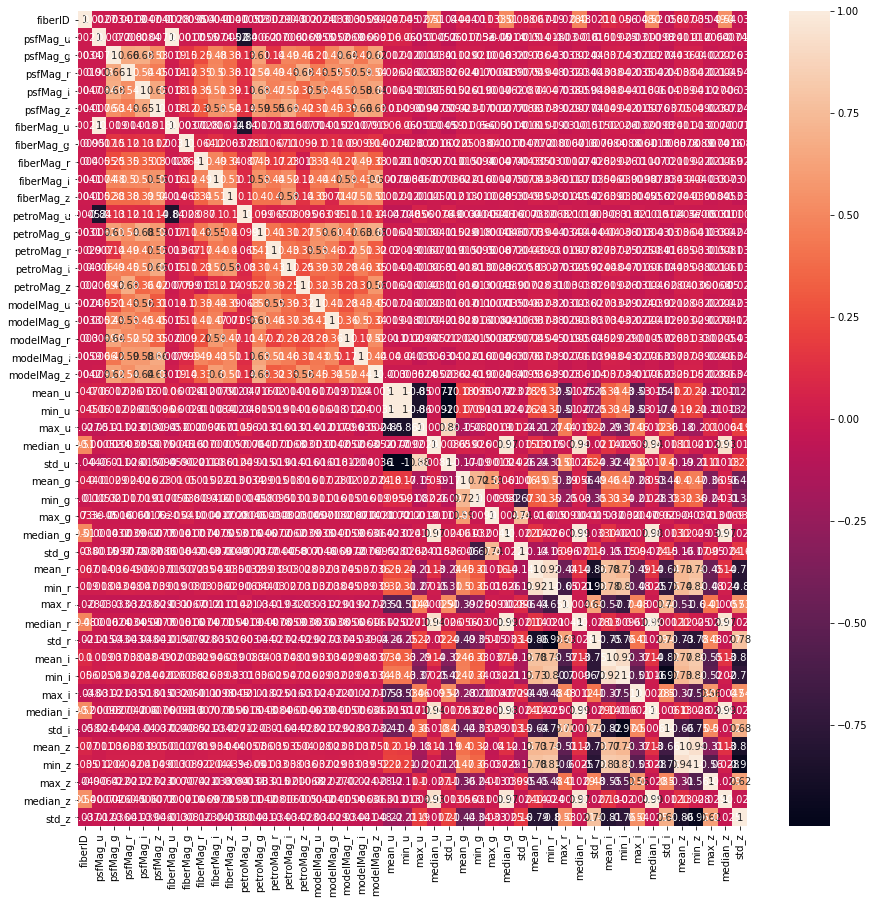

In [213]:
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(),annot= True)

In [214]:
train_df.columns

Index(['type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z', 'mean_u', 'min_u', 'max_u', 'median_u', 'std_u', 'mean_g',
       'min_g', 'max_g', 'median_g', 'std_g', 'mean_r', 'min_r', 'max_r',
       'median_r', 'std_r', 'mean_i', 'min_i', 'max_i', 'median_i', 'std_i',
       'mean_z', 'min_z', 'max_z', 'median_z', 'std_z'],
      dtype='object')

In [215]:
aa = train_df[['fiberID','mean_u', 'min_u', 'max_u', 'median_u', 'std_u', 'mean_g',
       'min_g', 'max_g', 'median_g', 'std_g', 'mean_r', 'min_r', 'max_r',
       'median_r', 'std_r', 'mean_i', 'min_i', 'max_i', 'median_i', 'std_i',
       'mean_z', 'min_z', 'max_z', 'median_z', 'std_z']]

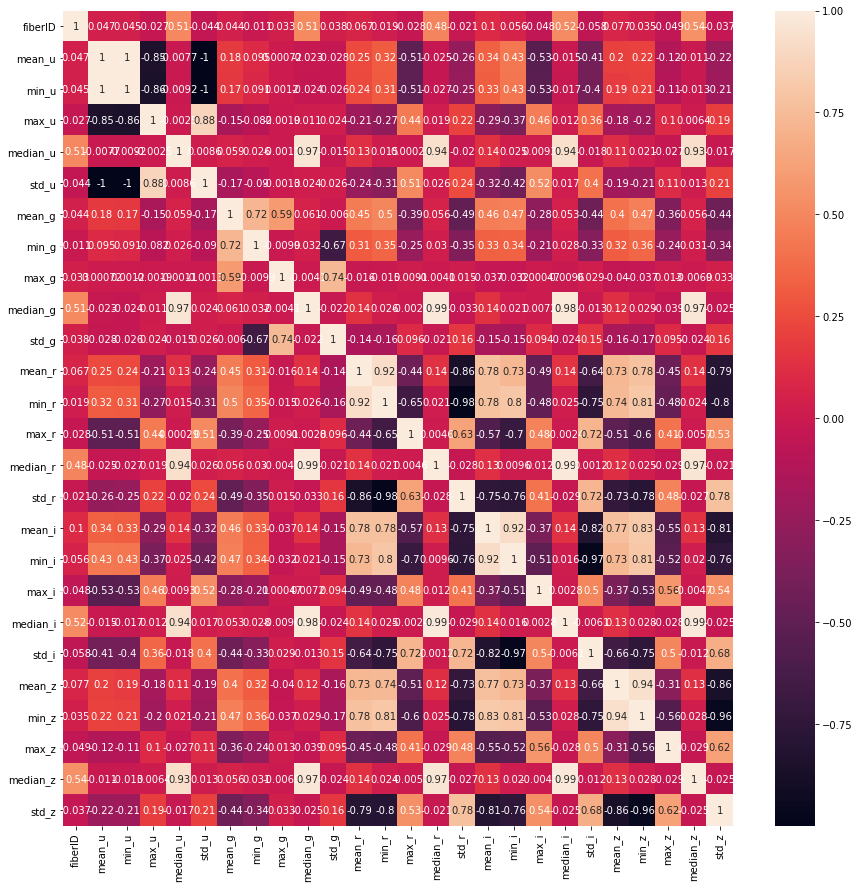

In [216]:
plt.figure(figsize=(15,15))
sns.heatmap(aa.corr(),annot= True)

#### 함수화 

In [219]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [223]:
def fiberID_agg(data):
    '''
    fiberID는 1~1000까지 숫자로 구성되어있는 카테고리 변수다.
    numeric한 변수가 아니기때문에 이를 이용한 변수 생성이 필요하다 판단되어
    ugriz밴드를 기반으로 통계적 수치 median, std를 산출한다
    '''
    ori_name = ["psfMag","fiberMag","petroMag","modelMag"]
    add_name = ["u","g","r","i","z"]
    
    for add in add_name:
        selected = list(map(lambda x : x+"_"+add,ori_name))
        columns = data[selected].columns 
        columns = list(columns)
        columns.append("fiberID")

        #dictinary_set
#         mean_dict = dict(data[columns].groupby("fiberID").mean().mean(axis = 1))
#         min_dict = dict(data[columns].groupby("fiberID").min().min(axis = 1))
#         max_dict = dict(data[columns].groupby("fiberID").max().max(axis = 1))
        median_dict = dict(data[columns].groupby("fiberID").median().median(axis = 1))
        std_dict = dict(data[columns].groupby("fiberID").std().std(axis = 1))

        #save
#         data["mean_"+add] = data.fiberID.apply(lambda x : mean_dict.get(x))
#         data["min_"+add] = data.fiberID.apply(lambda x : min_dict.get(x))
#         data["max_"+add] = data.fiberID.apply(lambda x : max_dict.get(x))
        data["median_"+add] = data.fiberID.apply(lambda x : median_dict.get(x))
        data["std_"+add] = data.fiberID.apply(lambda x : std_dict.get(x))
    return data

In [220]:
train_df = fiberID_agg(train_df)
test_df = fiberID_agg(test_df)